Article: TBA\
Code: Data Analysis of Video Game Data\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vg_sales = pd.read_csv('video_game_sales.csv', index_col='Rank')
vg_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [4]:
vg_sales = vg_sales.dropna(axis=0).reset_index(drop=True)

In [5]:
platform_sales = vg_sales.groupby(['Platform']).sum().sort_values('Global_Sales', ascending=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
platform_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91


In [6]:
platform_dum_values = np.arange(0, len(platform_sales.index[:10])*2, 2)
bar_width = 0.3

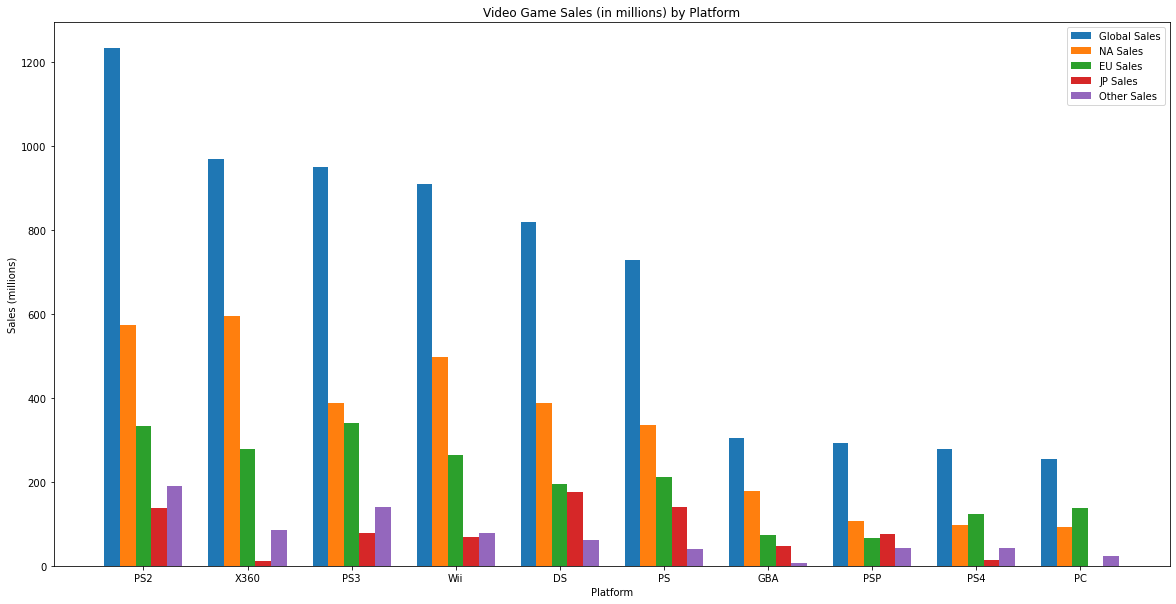

In [7]:
plt.figure(figsize=(20,10))
plt.bar(platform_dum_values, platform_sales['Global_Sales'][0:10], width=bar_width, label='Global Sales')
plt.bar(platform_dum_values+bar_width, platform_sales['NA_Sales'][0:10], width=bar_width, label='NA Sales')
plt.bar(platform_dum_values+(bar_width*2), platform_sales['EU_Sales'][0:10], width=bar_width, label='EU Sales')
plt.bar(platform_dum_values+(bar_width*3), platform_sales['JP_Sales'][0:10], width=bar_width, label='JP Sales')
plt.bar(platform_dum_values+(bar_width*4), platform_sales['Other_Sales'][0:10], width=bar_width, label='Other Sales')
plt.xticks(platform_dum_values + (bar_width * (len(platform_sales.columns)-1)/2), labels=platform_sales.index[:10])
plt.title('Video Game Sales (in millions) by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.legend()
plt.show()

In [8]:
yearly_sales = vg_sales.groupby(['Year']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
yearly_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


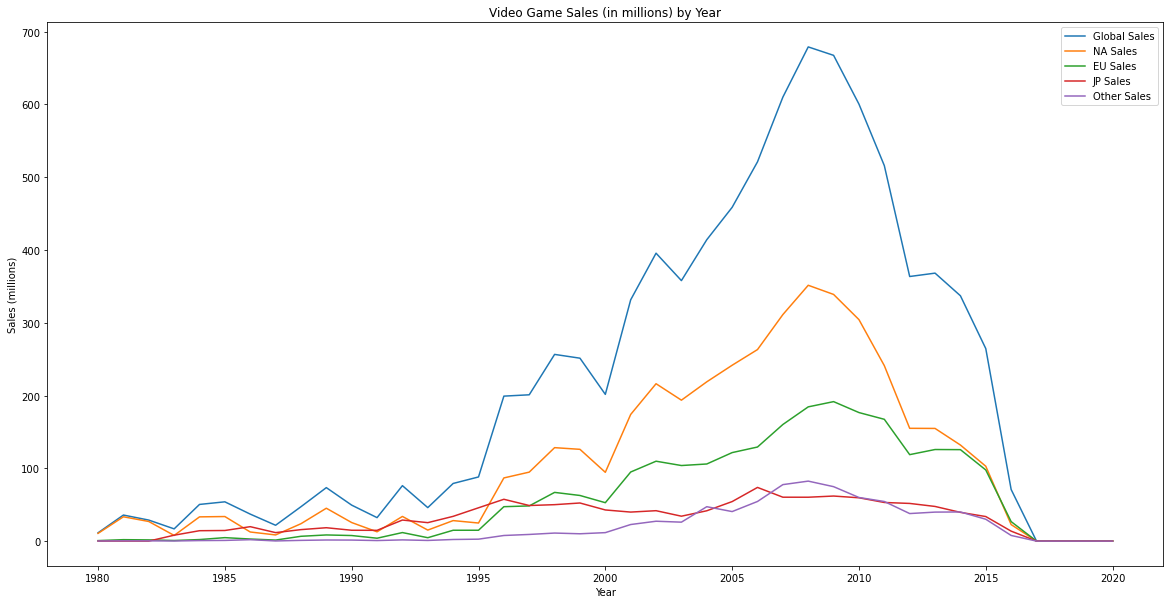

In [9]:
plt.figure(figsize=(20,10))
plt.plot(yearly_sales.index, yearly_sales['Global_Sales'], label='Global Sales')
plt.plot(yearly_sales.index, yearly_sales['NA_Sales'], label='NA Sales')
plt.plot(yearly_sales.index, yearly_sales['EU_Sales'], label='EU Sales')
plt.plot(yearly_sales.index, yearly_sales['JP_Sales'], label='JP Sales')
plt.plot(yearly_sales.index, yearly_sales['Other_Sales'], label='Other Sales')
plt.title('Video Game Sales (in millions) by Year')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.legend()
plt.show()

In [10]:
genre_sales = vg_sales.groupby(['Genre']).sum().sort_values('Global_Sales', ascending=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13


In [11]:
genre_dum_values = np.arange(0, len(genre_sales.index)*2, 2)
bar_width = 0.3

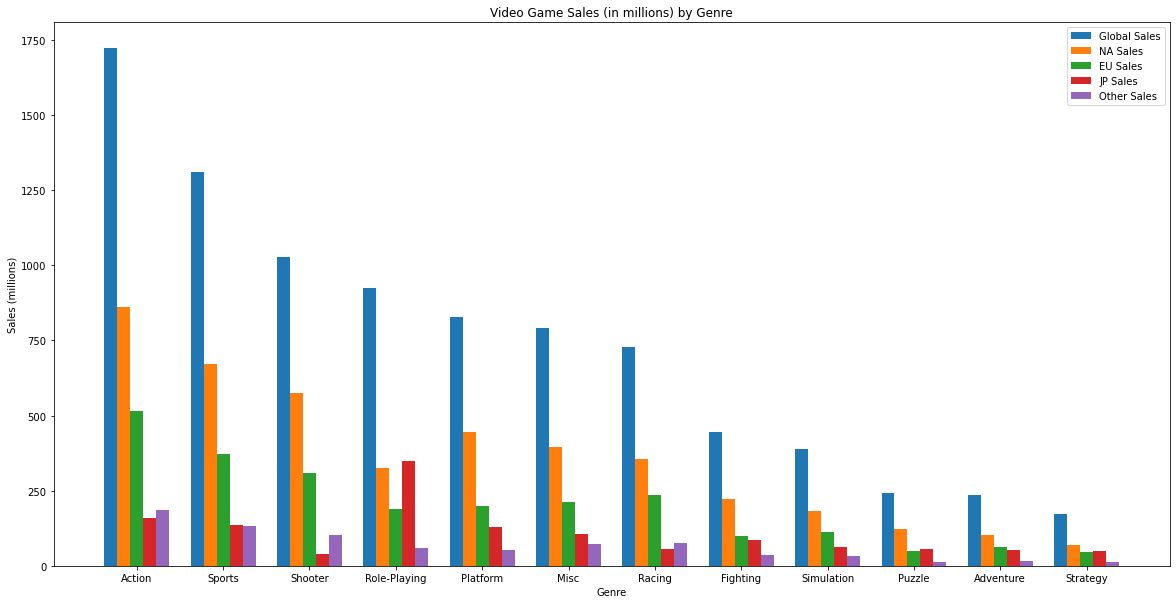

In [12]:
plt.figure(figsize=(20,10))
plt.bar(genre_dum_values, genre_sales['Global_Sales'], width=bar_width, label='Global Sales')
plt.bar(genre_dum_values+bar_width, genre_sales['NA_Sales'], width=bar_width, label='NA Sales')
plt.bar(genre_dum_values+(bar_width*2), genre_sales['EU_Sales'], width=bar_width, label='EU Sales')
plt.bar(genre_dum_values+(bar_width*3), genre_sales['JP_Sales'], width=bar_width, label='JP Sales')
plt.bar(genre_dum_values+(bar_width*4), genre_sales['Other_Sales'], width=bar_width, label='Other Sales')
plt.xticks(genre_dum_values + (bar_width * (len(genre_sales.columns)-1)/2), labels=genre_sales.index)
plt.title('Video Game Sales (in millions) by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.legend()
plt.show()

In [13]:
publisher_sales = vg_sales.groupby(['Publisher']).sum().sort_values('Global_Sales', ascending=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
publisher_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54


In [14]:
publisher_dum_values = np.arange(0, len(publisher_sales.index[0:20])*2, 2)
bar_width = 0.3

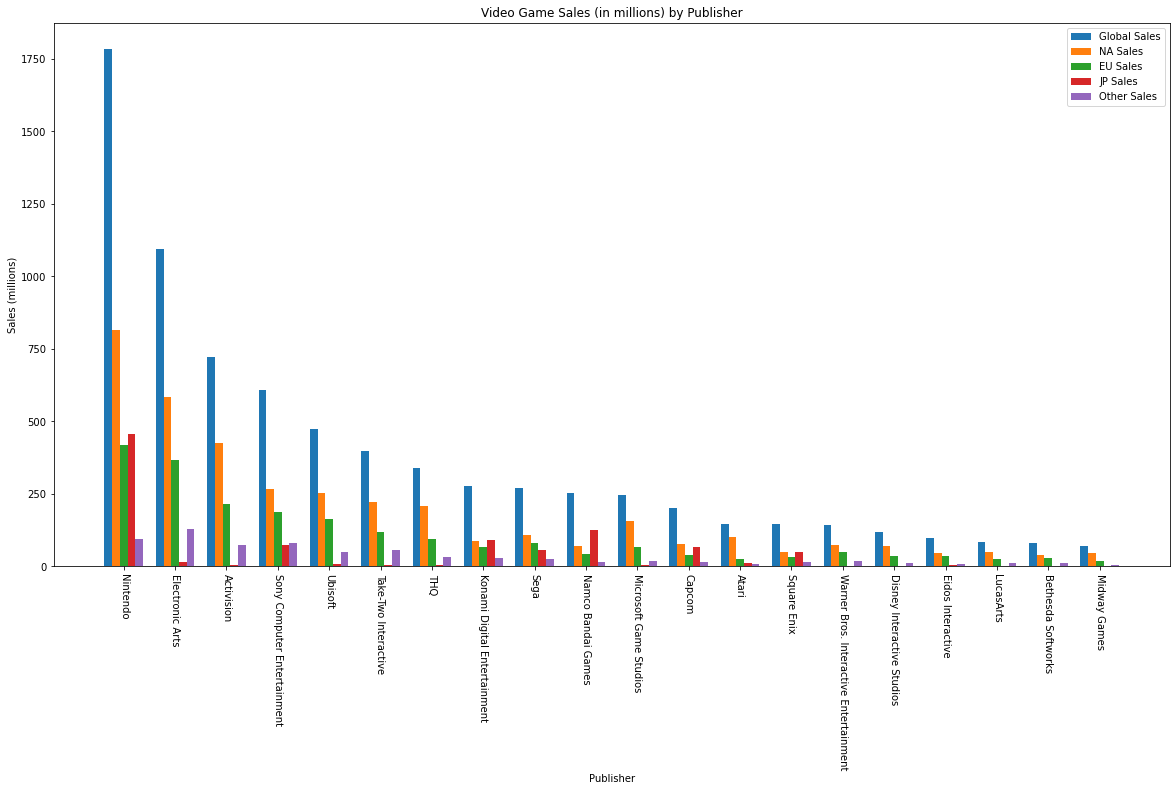

In [15]:
plt.figure(figsize=(20,10))
plt.bar(publisher_dum_values, publisher_sales['Global_Sales'][:20], width=bar_width, label='Global Sales')
plt.bar(publisher_dum_values+bar_width, publisher_sales['NA_Sales'][:20], width=bar_width, label='NA Sales')
plt.bar(publisher_dum_values+(bar_width*2), publisher_sales['EU_Sales'][:20], width=bar_width, label='EU Sales')
plt.bar(publisher_dum_values+(bar_width*3), publisher_sales['JP_Sales'][:20], width=bar_width, label='JP Sales')
plt.bar(publisher_dum_values+(bar_width*4), publisher_sales['Other_Sales'][:20], width=bar_width, label='Other Sales')
plt.xticks(publisher_dum_values + (bar_width * (len(publisher_sales.columns[:20])-1)/2), labels=publisher_sales.index[:20], rotation=270)
plt.title('Video Game Sales (in millions) by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.legend()
plt.show()

In [16]:
platform_yearly_sales = vg_sales.groupby(['Platform', 'Year']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
platform_yearly_sales.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Year                                                           
2600     1980.0     10.59      0.67       0.0         0.12         11.38
         1981.0     33.40      1.96       0.0         0.32         35.77
         1982.0     26.92      1.65       0.0         0.31         28.86
         1983.0      5.44      0.34       0.0         0.06          5.83
         1984.0      0.26      0.01       0.0         0.00          0.27

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/4165167689.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


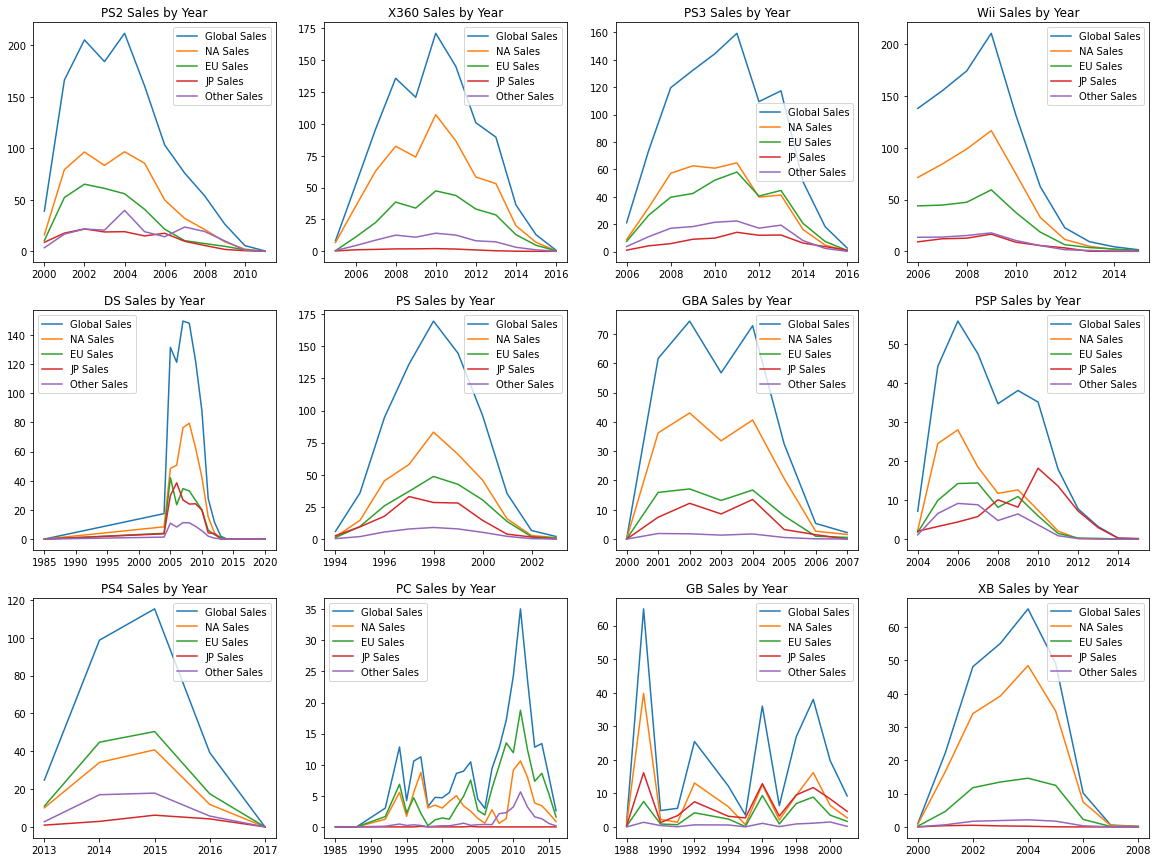

In [17]:
fig, ax = plt.subplots(3,4,figsize=(20,15))
for i in range(0,len(platform_sales[0:12].index)):
    row_index = int(i/4)
    col_index = i%4
    title_string = platform_sales.index[i] + ' Sales by Year'
    ax[row_index,col_index].plot(platform_yearly_sales.loc[platform_sales.index[i]].index, platform_yearly_sales.loc[platform_sales.index[i]]['Global_Sales'], label='Global Sales')
    ax[row_index,col_index].plot(platform_yearly_sales.loc[platform_sales.index[i]].index, platform_yearly_sales.loc[platform_sales.index[i]]['NA_Sales'], label='NA Sales')
    ax[row_index,col_index].plot(platform_yearly_sales.loc[platform_sales.index[i]].index, platform_yearly_sales.loc[platform_sales.index[i]]['EU_Sales'], label='EU Sales')
    ax[row_index,col_index].plot(platform_yearly_sales.loc[platform_sales.index[i]].index, platform_yearly_sales.loc[platform_sales.index[i]]['JP_Sales'], label='JP Sales')
    ax[row_index,col_index].plot(platform_yearly_sales.loc[platform_sales.index[i]].index, platform_yearly_sales.loc[platform_sales.index[i]]['Other_Sales'], label='Other Sales')
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].legend()
fig.show()

In [18]:
genre_yearly_sales = vg_sales.groupby(['Genre', 'Year']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_yearly_sales.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre  Year                                                           
Action 1980.0      0.32      0.02      0.00         0.00          0.34
       1981.0     13.86      0.81      0.00         0.12         14.84
       1982.0      6.07      0.38      0.00         0.05          6.52
       1983.0      2.67      0.17      0.00         0.02          2.86
       1984.0      0.80      0.19      0.83         0.03          1.85

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/1696889043.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


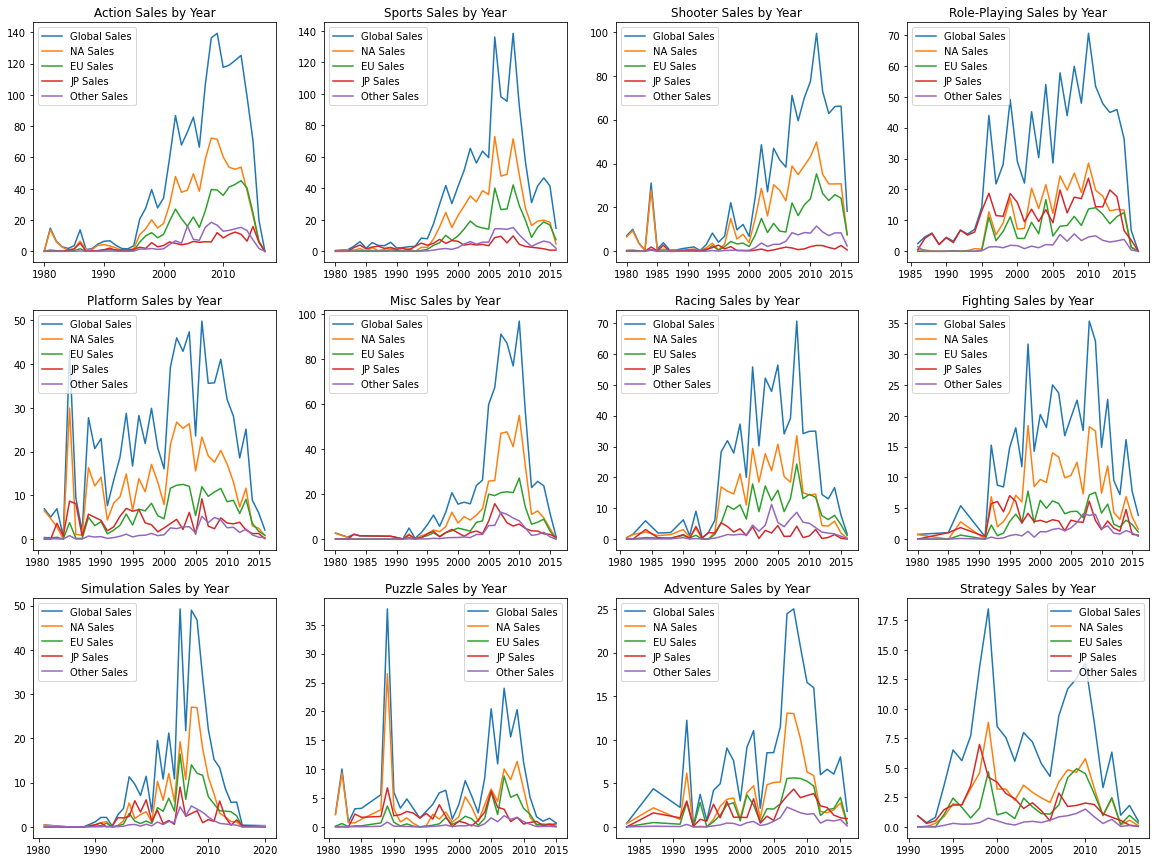

In [19]:
fig, ax = plt.subplots(3,4,figsize=(20,15))
for i in range(0,len(genre_sales.index)):
    row_index = int(i/4)
    col_index = i%4
    title_string = genre_sales.index[i] + ' Sales by Year'
    ax[row_index,col_index].plot(genre_yearly_sales.loc[genre_sales.index[i]].index, genre_yearly_sales.loc[genre_sales.index[i]]['Global_Sales'], label='Global Sales')
    ax[row_index,col_index].plot(genre_yearly_sales.loc[genre_sales.index[i]].index, genre_yearly_sales.loc[genre_sales.index[i]]['NA_Sales'], label='NA Sales')
    ax[row_index,col_index].plot(genre_yearly_sales.loc[genre_sales.index[i]].index, genre_yearly_sales.loc[genre_sales.index[i]]['EU_Sales'], label='EU Sales')
    ax[row_index,col_index].plot(genre_yearly_sales.loc[genre_sales.index[i]].index, genre_yearly_sales.loc[genre_sales.index[i]]['JP_Sales'], label='JP Sales')
    ax[row_index,col_index].plot(genre_yearly_sales.loc[genre_sales.index[i]].index, genre_yearly_sales.loc[genre_sales.index[i]]['Other_Sales'], label='Other Sales')
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].legend()
fig.show()

In [20]:
publisher_yearly_sales = vg_sales.groupby(['Publisher','Year']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
publisher_yearly_sales.head()

NA_Sales  EU_Sales  JP_Sales  \
Publisher                    Year                                   
10TACLE Studios              2006.0      0.01      0.01       0.0   
                             2007.0      0.06      0.03       0.0   
1C Company                   2009.0      0.00      0.01       0.0   
                             2011.0      0.01      0.06       0.0   
20th Century Fox Video Games 1981.0      1.27      0.07       0.0   

                                     Other_Sales  Global_Sales  
Publisher                    Year                               
10TACLE Studios              2006.0         0.00          0.02  
                             2007.0         0.00          0.09  
1C Company                   2009.0         0.00          0.01  
                             2011.0         0.02          0.09  
20th Century Fox Video Games 1981.0         0.01          1.35

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/766564138.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


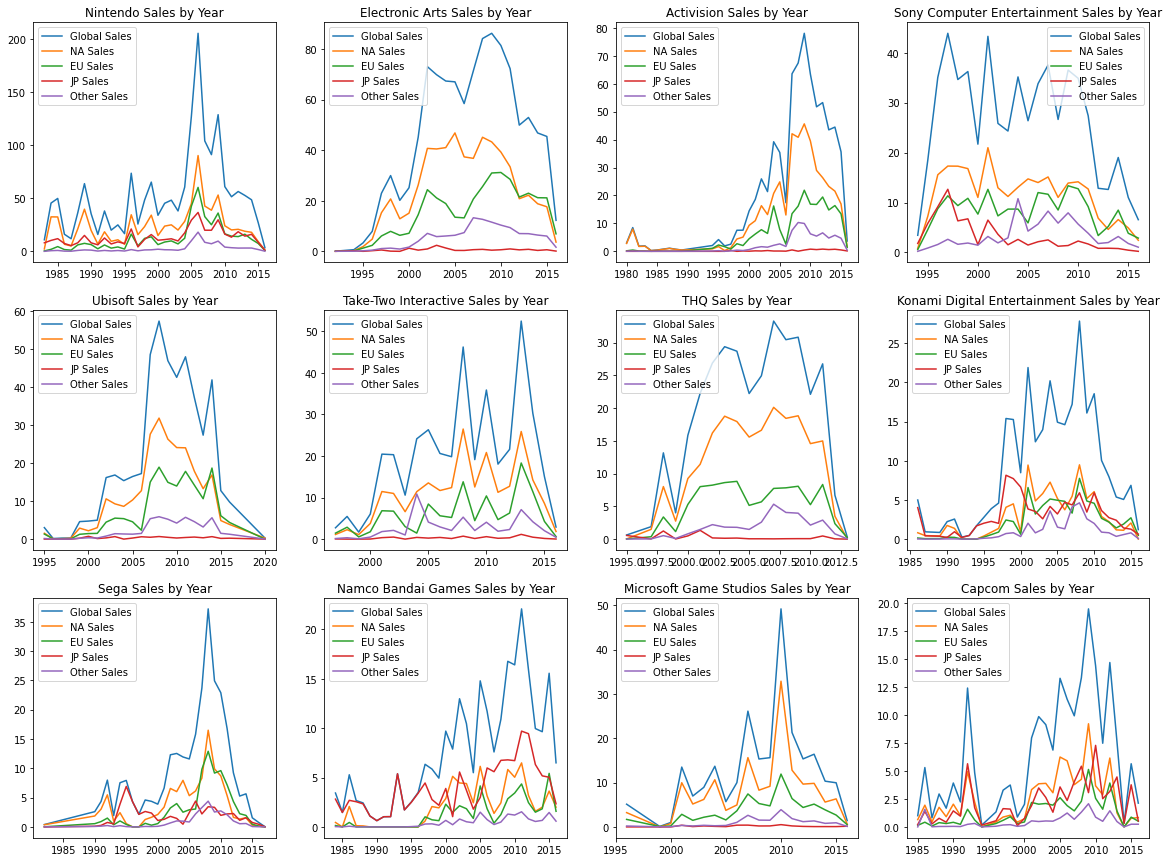

In [21]:
fig, ax = plt.subplots(3,4,figsize=(20,15))
for i in range(0,len(publisher_sales.index[0:12])):
    row_index = int(i/4)
    col_index = i%4
    title_string = publisher_sales.index[i] + ' Sales by Year'
    ax[row_index,col_index].plot(publisher_yearly_sales.loc[publisher_sales.index[i]].index, publisher_yearly_sales.loc[publisher_sales.index[i]]['Global_Sales'], label='Global Sales')
    ax[row_index,col_index].plot(publisher_yearly_sales.loc[publisher_sales.index[i]].index, publisher_yearly_sales.loc[publisher_sales.index[i]]['NA_Sales'], label='NA Sales')
    ax[row_index,col_index].plot(publisher_yearly_sales.loc[publisher_sales.index[i]].index, publisher_yearly_sales.loc[publisher_sales.index[i]]['EU_Sales'], label='EU Sales')
    ax[row_index,col_index].plot(publisher_yearly_sales.loc[publisher_sales.index[i]].index, publisher_yearly_sales.loc[publisher_sales.index[i]]['JP_Sales'], label='JP Sales')
    ax[row_index,col_index].plot(publisher_yearly_sales.loc[publisher_sales.index[i]].index, publisher_yearly_sales.loc[publisher_sales.index[i]]['Other_Sales'], label='Other Sales')
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].legend()
fig.show()

In [22]:
platform_genre_sales = vg_sales.groupby(['Platform', 'Genre']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
platform_genre_sales.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Genre                                                             
2600     Action        24.63      1.47       0.0         0.21         26.39
         Adventure      0.38      0.02       0.0         0.00          0.40
         Fighting       0.72      0.04       0.0         0.01          0.77
         Misc           3.34      0.20       0.0         0.03          3.58
         Platform      12.38      0.72       0.0         0.16         13.27

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/3283158166.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


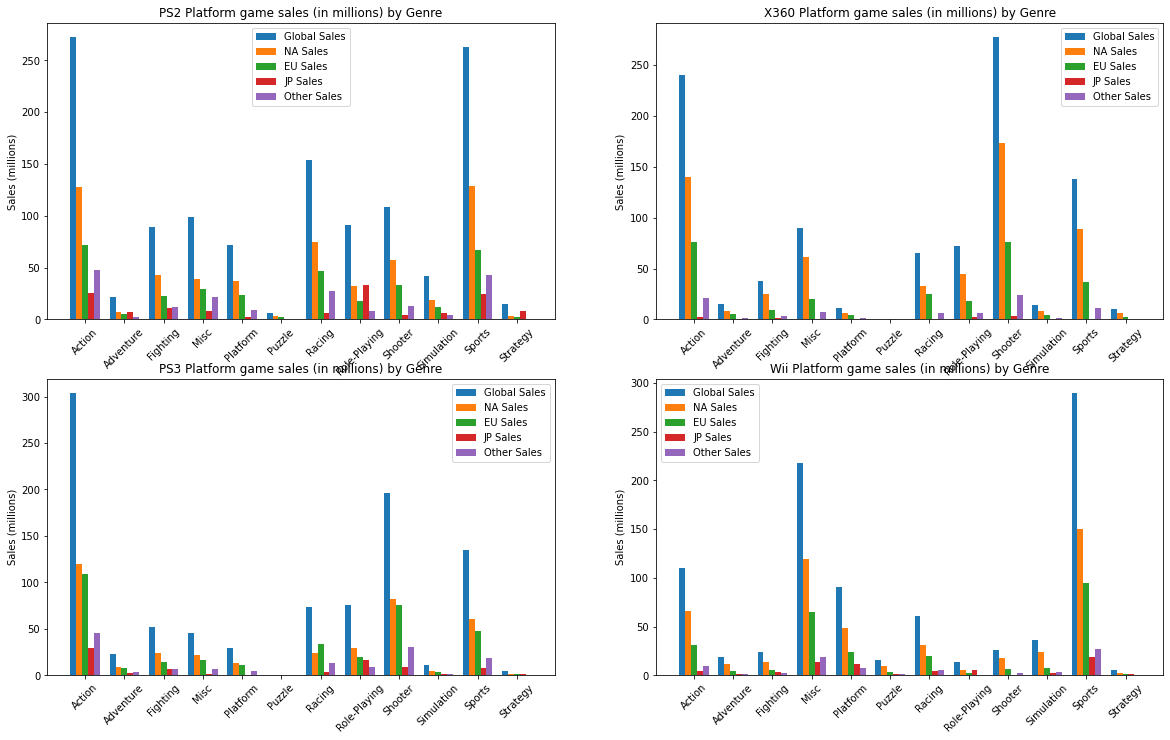

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
bar_width=0.3
for i in range(0,len(platform_sales.index[0:4])):
    row_index = int(i/2)
    col_index = i%2
    title_string = platform_sales.index[i] + ' Platform game sales (in millions) by Genre'
    dum_values = np.arange(0,len(platform_genre_sales.loc[platform_sales.index[i]].index)*2,2)
    ax[row_index,col_index].bar(dum_values, platform_genre_sales.loc[platform_sales.index[i]]['Global_Sales'], width=bar_width, label='Global Sales')
    ax[row_index,col_index].bar(dum_values + bar_width, platform_genre_sales.loc[platform_sales.index[i]]['NA_Sales'], width=bar_width, label='NA Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*2, platform_genre_sales.loc[platform_sales.index[i]]['EU_Sales'], width=bar_width, label='EU Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*3, platform_genre_sales.loc[platform_sales.index[i]]['JP_Sales'], width=bar_width, label='JP Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*4, platform_genre_sales.loc[platform_sales.index[i]]['Other_Sales'], width=bar_width, label='Other Sales')
    ax[row_index,col_index].set_xticks(dum_values + (bar_width * (len(platform_genre_sales.loc[platform_sales.index[i]].columns)-1)/2))
    ax[row_index,col_index].set_xticklabels(platform_genre_sales.loc[platform_sales.index[i]].index, rotation=45)
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].set_ylabel('Sales (millions)')
    ax[row_index,col_index].legend()
fig.show()

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/3754497716.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


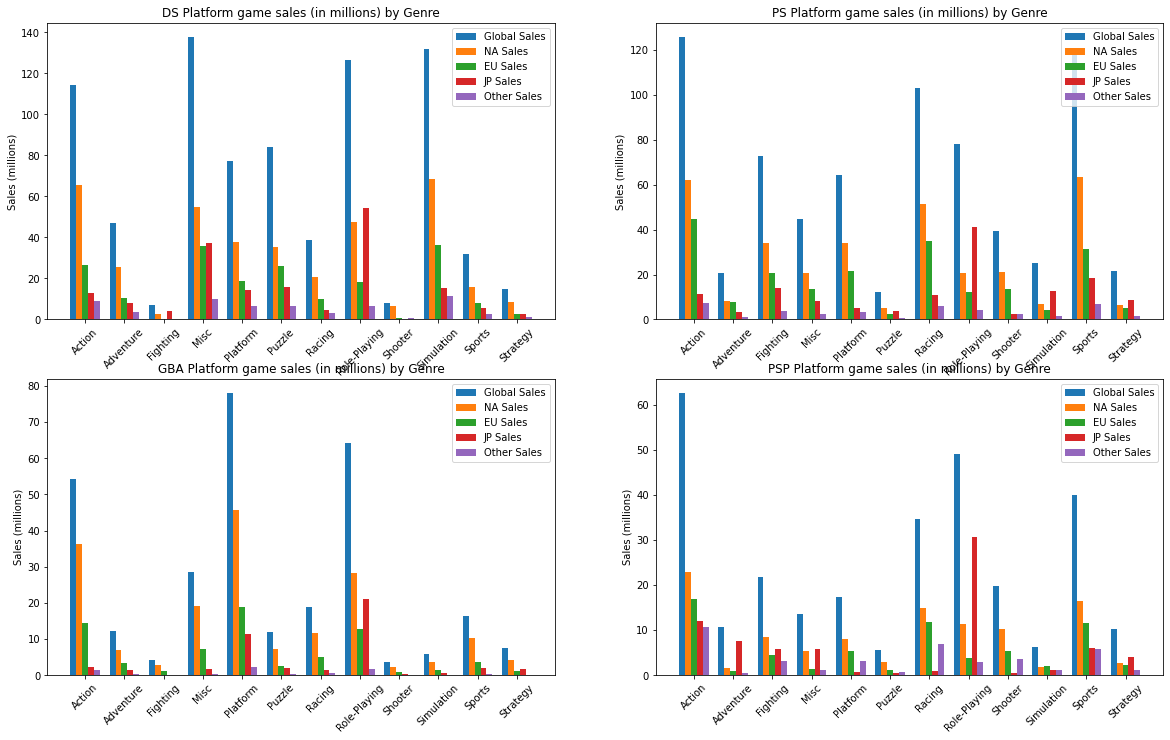

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
bar_width=0.3
for i in range(4,len(platform_sales.index[4:8])+4):
    row_index = int(i/2) - 2
    col_index = i%2
    title_string = platform_sales.index[i] + ' Platform game sales (in millions) by Genre'
    dum_values = np.arange(0,len(platform_genre_sales.loc[platform_sales.index[i]].index)*2,2)
    ax[row_index,col_index].bar(dum_values, platform_genre_sales.loc[platform_sales.index[i]]['Global_Sales'], width=bar_width, label='Global Sales')
    ax[row_index,col_index].bar(dum_values + bar_width, platform_genre_sales.loc[platform_sales.index[i]]['NA_Sales'], width=bar_width, label='NA Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*2, platform_genre_sales.loc[platform_sales.index[i]]['EU_Sales'], width=bar_width, label='EU Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*3, platform_genre_sales.loc[platform_sales.index[i]]['JP_Sales'], width=bar_width, label='JP Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*4, platform_genre_sales.loc[platform_sales.index[i]]['Other_Sales'], width=bar_width, label='Other Sales')
    ax[row_index,col_index].set_xticks(dum_values + (bar_width * (len(platform_genre_sales.loc[platform_sales.index[i]].columns)-1)/2))
    ax[row_index,col_index].set_xticklabels(platform_genre_sales.loc[platform_sales.index[i]].index, rotation=45)
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].set_ylabel('Sales (millions)') 
    ax[row_index,col_index].legend()
fig.show()

C:\Users\AWAISN~1\AppData\Local\Temp/ipykernel_14764/2774783609.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


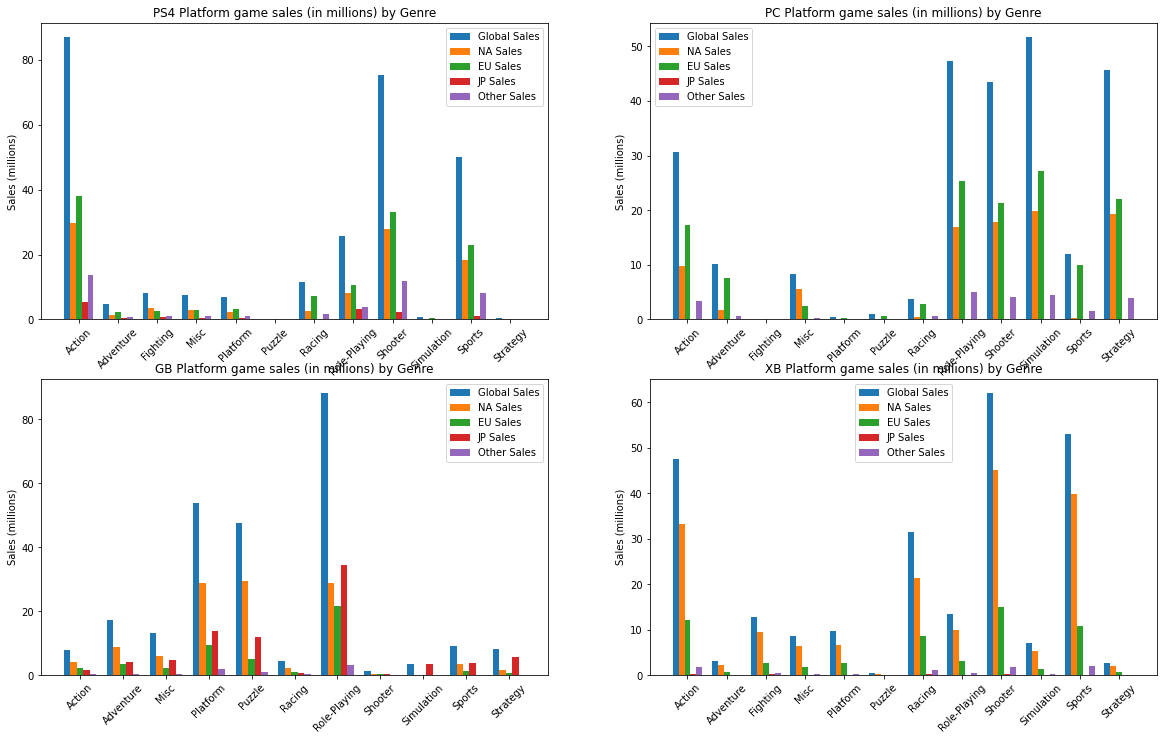

In [25]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
bar_width=0.3
for i in range(8,len(platform_sales.index[8:12])+8):
    row_index = int(i/2) - 4
    col_index = i%2
    title_string = platform_sales.index[i] + ' Platform game sales (in millions) by Genre'
    dum_values = np.arange(0,len(platform_genre_sales.loc[platform_sales.index[i]].index)*2,2)
    ax[row_index,col_index].bar(dum_values, platform_genre_sales.loc[platform_sales.index[i]]['Global_Sales'], width=bar_width, label='Global Sales')
    ax[row_index,col_index].bar(dum_values + bar_width, platform_genre_sales.loc[platform_sales.index[i]]['NA_Sales'], width=bar_width, label='NA Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*2, platform_genre_sales.loc[platform_sales.index[i]]['EU_Sales'], width=bar_width, label='EU Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*3, platform_genre_sales.loc[platform_sales.index[i]]['JP_Sales'], width=bar_width, label='JP Sales')
    ax[row_index,col_index].bar(dum_values + bar_width*4, platform_genre_sales.loc[platform_sales.index[i]]['Other_Sales'], width=bar_width, label='Other Sales')
    ax[row_index,col_index].set_xticks(dum_values + (bar_width * (len(platform_genre_sales.loc[platform_sales.index[i]].columns)-1)/2))
    ax[row_index,col_index].set_xticklabels(platform_genre_sales.loc[platform_sales.index[i]].index, rotation=45)
    ax[row_index,col_index].set_title(title_string)
    ax[row_index,col_index].set_ylabel('Sales (millions)') 
    ax[row_index,col_index].legend()
fig.show()